# 8. Нейронной сети 2

In [1]:
import torch

In [2]:
from setup_libs import *

In [3]:
from torch.nn import Sequential, Linear, LogSoftmax, Sigmoid, Flatten, Softmax, ReLU

# 8.1 Задача бинарной классификации

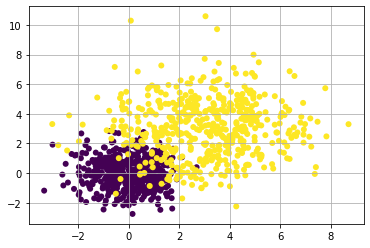

In [4]:
# Generate some data
# Generate some data
X, y = get_clf_dataset(500)

Y = np.vstack([y, 1-y]).T #обратите внимание что двумерный
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')
plt.grid()

In [5]:
t_X = torch.FloatTensor(X)
t_y = torch.FloatTensor(Y[:,0]).unsqueeze(-1)

In [6]:
t_y.size()

torch.Size([1000, 1])

## Sigmoid and BCELoss (Binary Cross Entropy)
* [BCELoss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)
* [Sigmoid](https://pytorch.org/docs/stable/generated/torch.sigmoid.html)

In [7]:
model = Sequential(
    Linear(2, 5), # старая добрая линейка
    Linear(5, 1),
    Sigmoid() # сигмоида
)

# Обозначили лосс
criterion = torch.nn.BCELoss()

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# Спуск
for t in range(2000):
    y_pred = model(t_X)
    loss = criterion(y_pred, t_y)
    
    if t % 100 == 99:
        print(t, loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



99 0.9358857274055481
199 0.81736159324646
299 0.7443968057632446
399 0.6953635811805725
499 0.6596710085868835
599 0.6319147348403931
699 0.6091712713241577
799 0.5897641777992249
899 0.5726816058158875
999 0.5572854280471802
1099 0.5431582927703857
1199 0.5300189256668091
1299 0.5176728963851929
1399 0.5059828162193298
1499 0.4948495030403137
1599 0.48420074582099915
1699 0.4739823341369629
1799 0.46415358781814575
1899 0.45468294620513916
1999 0.44554603099823


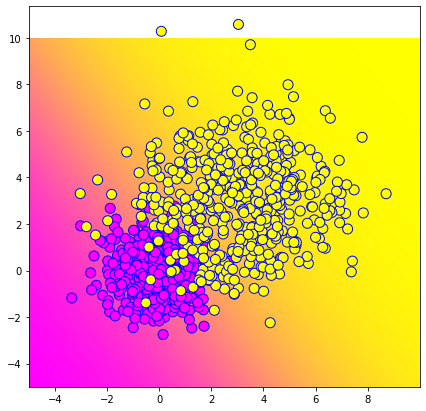

In [8]:
xx, yy = np.meshgrid(np.arange(-5, 10, .01), np.arange(-5, 10,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

predicted = model(torch.FloatTensor(input_field)).data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='spring')

ax.scatter(X[:, 0], X[:, 1], c=Y[:,0], s=100, cmap='spring', edgecolors='b')

# 8.2 Многоклассовая классификация

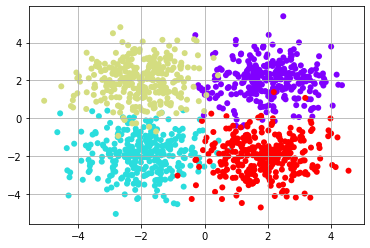

In [9]:
# Generate some data
N = 300

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])
X3 = np.random.randn(N,2) + np.array([-2,2])
X4 = np.random.randn(N,2) + np.array([2,-2])

labels = np.concatenate([np.zeros(N),np.ones(N), 2 * np.ones(N), 3 * np.ones(N)]).astype(np.int64)

X = np.vstack([X1,X2,X3,X4])
plt.scatter(X[:,0],X[:,1], c = labels, cmap='rainbow', edgecolors= 'none')
plt.grid()

## CrossEntropy and SoftMax (NLLLoss + LogSoftMax)

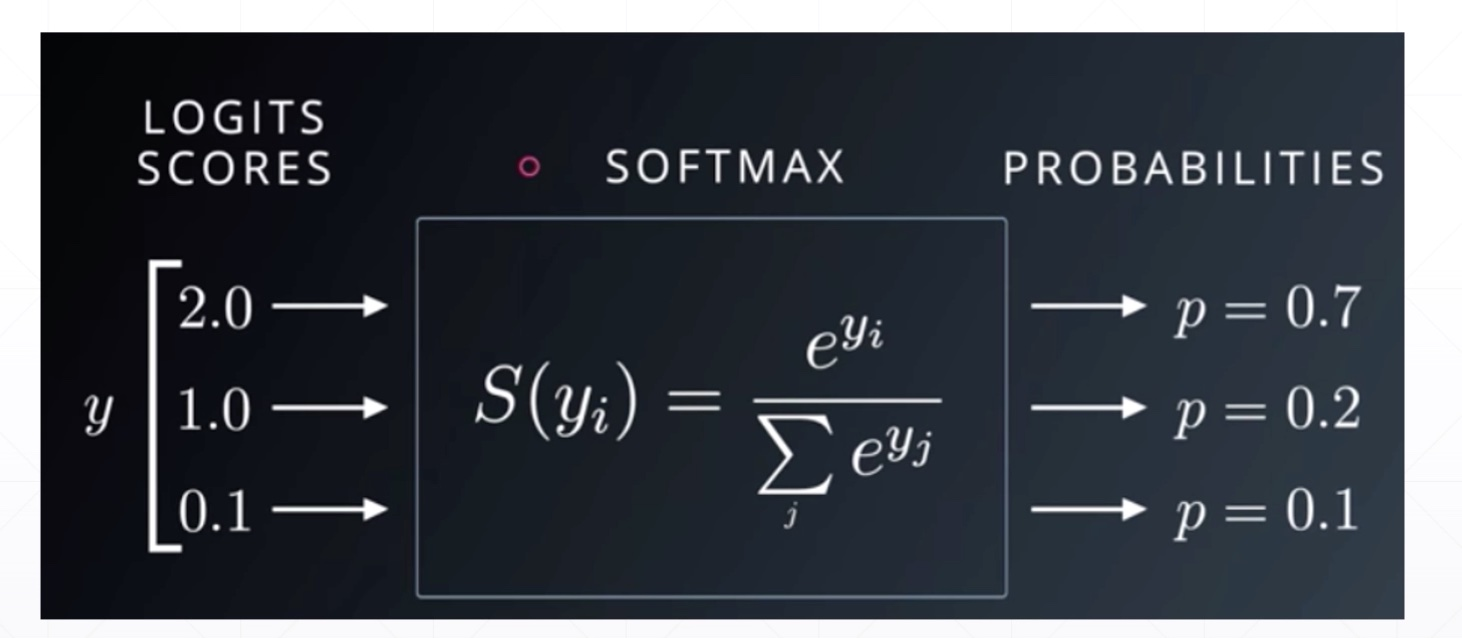

In [10]:
Image('images/softmax2.jpg', width=500)

$$ p_i = SoftMax(y_i) = \frac{e^{y_i}}{\sum_{i=j}e^{y_j}}$$

In [11]:
Softmax()(torch.tensor([1,2,3], dtype=float))

tensor([0.0900, 0.2447, 0.6652], dtype=torch.float64)

Пусть 
* $y_i^{real}$ - реальный класс $i$-го объекта, скаляр
* $p_i$ - вектор вероятностей каждого класса размера $C$ (кол-во классов)

Классы обозначаются числами $0, 1, \ldots, C-1$. Вероятность $k$-го класса $p_i^k$ находится на $k$-м месте $p_i[k]$.

Тогда кроссэнтропия для одного объекта будет считаться так:

$$CrossEntropy(p_i, y_i^{real}) = -\sum_{k=0}^{C-1}[y_i^{real} = k]\log{(p_i[k])}$$

где $[y_i^{real} = k]$ - индикатор, что индекс вектора совпадает с реальным классом.


В этой сумме будет только один ненулевой элемент, поэтому можно переписать как

$$CrossEntropy(p_i, y_i^{real}) = -\log{(p_i[y_i^{real}])}$$

$$p_i^k = \frac{e^{x_i[k]}}{\sum_{c = 0}^{C-1}e^{x_i[c]}}$$



[CrossEntropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)


In [12]:
t_X = torch.FloatTensor(X)
t_y = torch.LongTensor(labels) # индексы

In [13]:
model = Sequential(
    Linear(2, 4),
    Linear(4, 4), 
)

# Обозначили лосс
criterion = torch.nn.CrossEntropyLoss()

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# Спуск
for t in range(1000):
    # Нашли результат на текущей сети
    y_pred = model(t_X)
    # Посчитали ошибку
    loss = criterion(y_pred, t_y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()



99 0.5953897833824158
199 0.3510708510875702
299 0.25121966004371643
399 0.20444032549858093
499 0.17851458489894867
599 0.16228999197483063
699 0.15127402544021606
799 0.14335666596889496
899 0.1374243199825287
999 0.13283616304397583


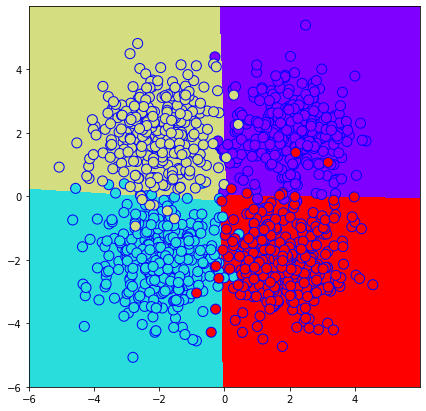

In [14]:
xx, yy = np.meshgrid(np.arange(-6, 6, .01), np.arange(-6, 6,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

result = model(torch.FloatTensor(input_field)).argmax(axis=1)

predicted = result.data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='rainbow')

ax.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='rainbow', edgecolors='b')

## LogSoftmax + NLLLoss

$$ LogSoftMax(y_i) = log\Big(\frac{e^{y_i}}{\sum_{i=j}e^{z_j}}\Big) $$

$$NLL = -\sum_{i=1}^{n}\log(p_{real-class})$$

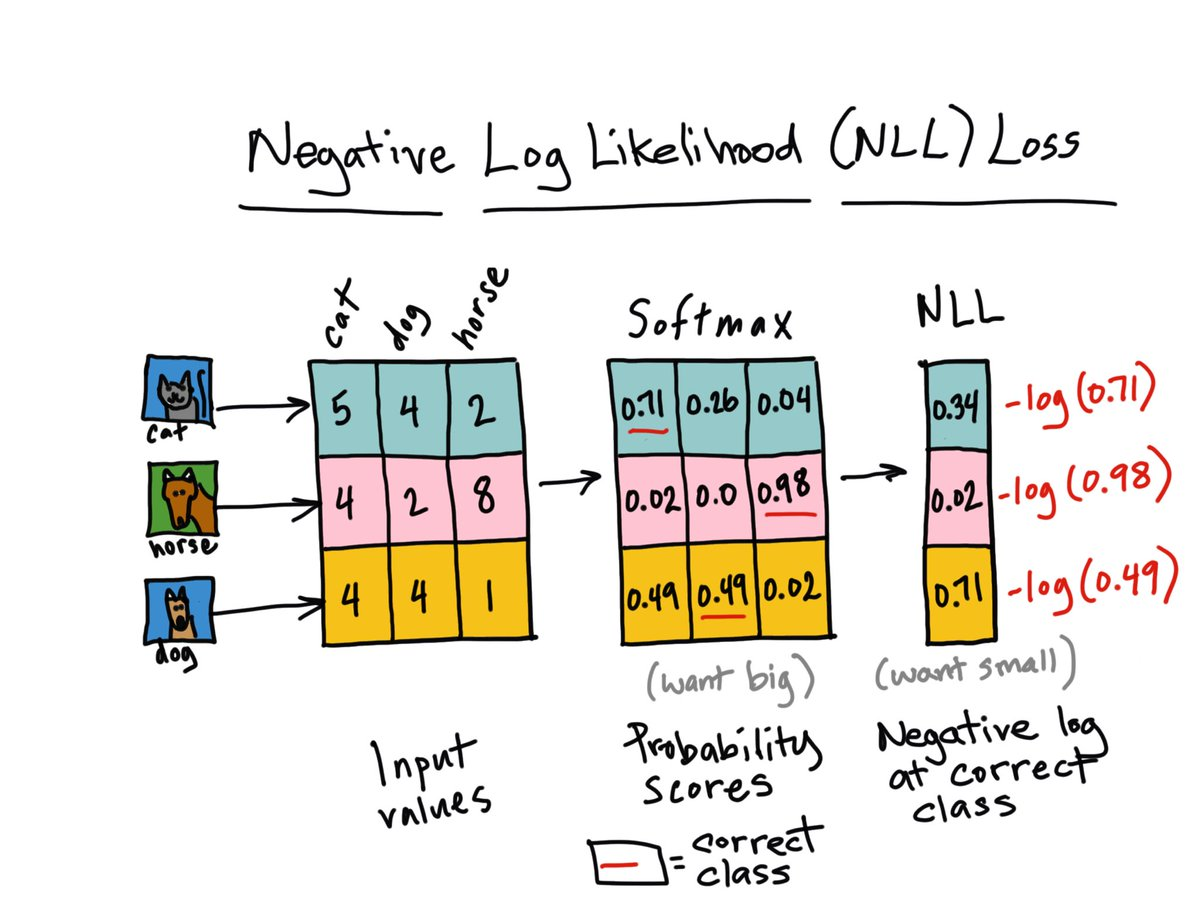

In [187]:
Image('images/nll.jpg', width=500)

In [19]:
model = Sequential(
    Linear(2, 4),
    LogSoftmax()
)

# Обозначили лосс
criterion = torch.nn.NLLLoss()

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# Спуск
for t in range(1000):
    # Нашли результат на текущей сети
    y_pred = model(t_X)
    # Посчитали ошибку
    loss = criterion(y_pred, t_y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()


    

99 0.4593537449836731
199 0.34061700105667114
299 0.28739508986473083
399 0.2560071051120758
499 0.2347954362630844
599 0.2192745953798294
699 0.20731553435325623
799 0.19776026904582977
899 0.18991735577583313
999 0.18334434926509857


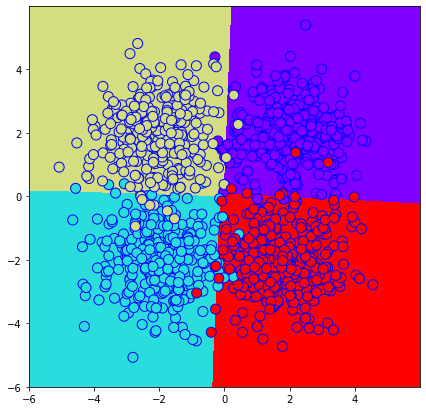

In [18]:
xx, yy = np.meshgrid(np.arange(-6, 6, .01), np.arange(-6, 6,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

result = model(torch.FloatTensor(input_field)).argmax(axis=1)

predicted = result.data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='rainbow')

ax.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='rainbow', edgecolors='b')

# 8.3 Зачем нужны активации

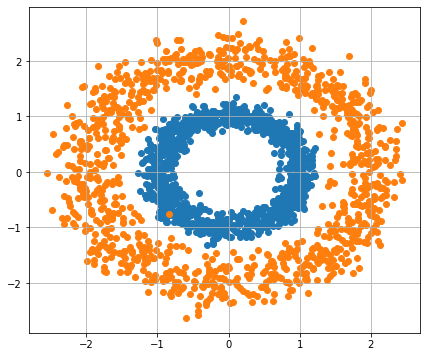

In [23]:
from random import gauss

num_samples = 1000
theta = np.linspace(0, 2*np.pi, num_samples)

r1 = 1
r2 = 2

rng = np.random.RandomState(1)

circle = np.hstack([np.cos(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 8), 
                    np.sin(theta).reshape((-1, 1)) + (rng.randn(num_samples)[:,np.newaxis] / 8)])
lil = r1 * circle
big = r2 * circle
X = np.vstack([lil, big])
labels = np.hstack([np.zeros(num_samples), np.ones(num_samples)])

# plots
plt.figure(figsize=(7,6))
plt.scatter(lil[:,0],lil[:,1])
plt.scatter(big[:,0],big[:,1])
plt.grid()

In [25]:
t_X = torch.FloatTensor(X)
t_y = torch.LongTensor(labels) # индексы

In [57]:
model = Sequential(
    Linear(2, 4),
    ReLU(),
    Linear(4, 2),
    LogSoftmax(),
)

# Обозначили лосс
criterion = torch.nn.NLLLoss()

# Выбрали алгоритм оптимизации
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# Спуск
for t in range(1000):
    # Нашли результат на текущей сети
    y_pred = model(t_X)
    # Посчитали ошибку
    loss = criterion(y_pred, t_y)
    if t % 100 == 99:
        print(t, loss.item())
    
    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()



99 0.5812706351280212
199 0.4976324141025543
299 0.3550008237361908
399 0.25180020928382874
499 0.1997961848974228
599 0.1683761477470398
699 0.14749790728092194
799 0.13253110647201538
899 0.12113379687070847
999 0.11211399734020233


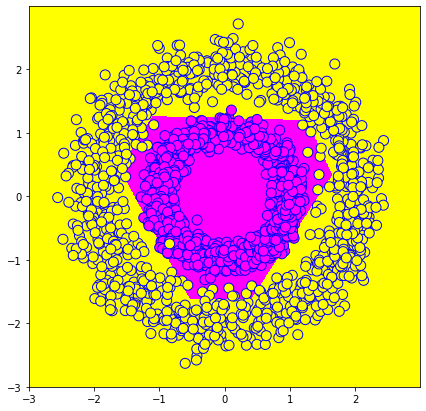

In [58]:
xx, yy = np.meshgrid(np.arange(-3, 3, .01), np.arange(-3, 3,.01))
input_field = np.c_[xx.ravel(), yy.ravel()]

result = model(torch.FloatTensor(input_field)).argmax(axis=1)

predicted = result.data.reshape(xx.shape)

# Отрисовка плоскости
plt.figure(figsize=(7, 7))
ax = plt.gca()
ax.pcolormesh(xx, yy, predicted, cmap='spring')

ax.scatter(X[:, 0], X[:, 1], c=labels, s=100, cmap='spring', edgecolors='b')

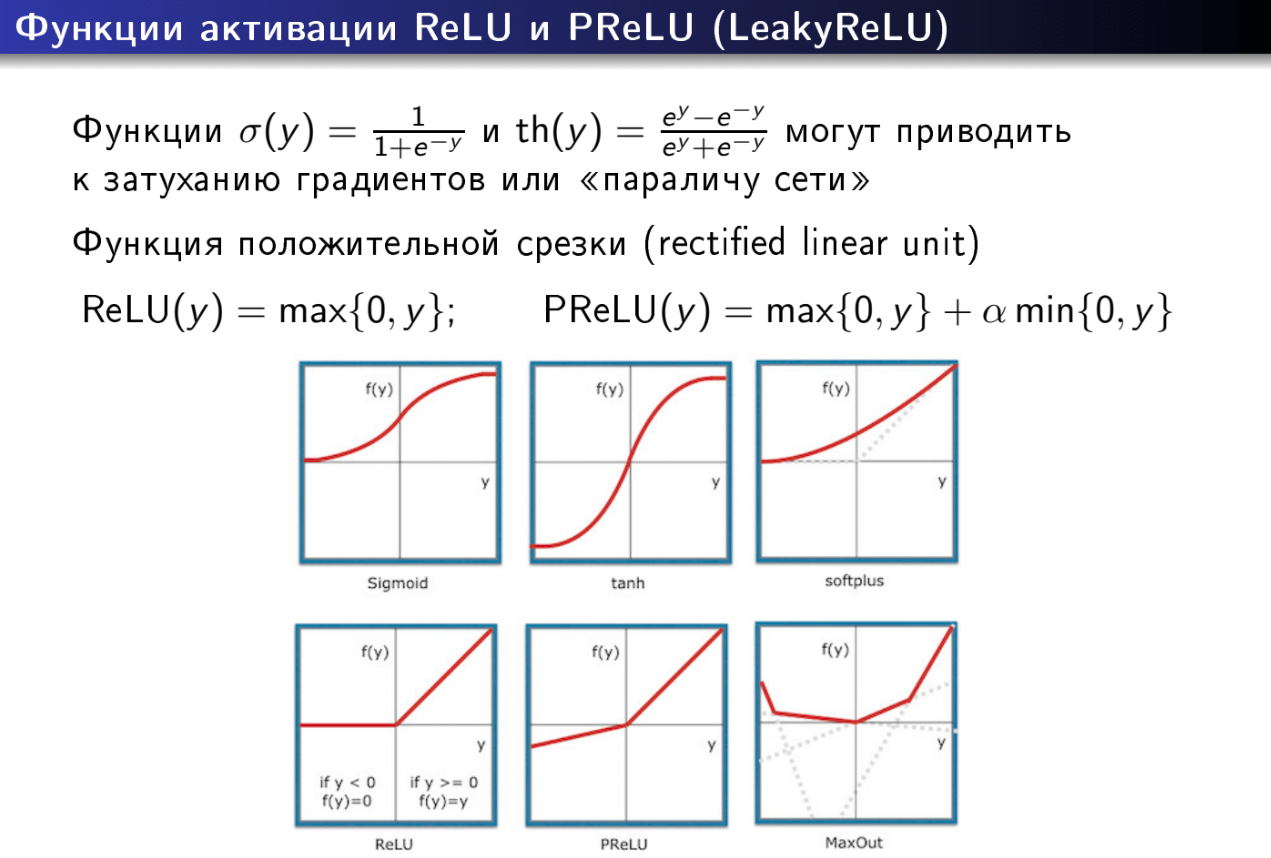

In [216]:
Image('images/activations.png', width=500)

# Ссылки
* [Softmax explanation](https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/)
* [Multiclass classification](https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab)